#### [ 이미지 - 이진화 ]
- 이미지를 검은색과 흰색만으로 표현
- 이미지에서 원하는 물체만 정확히 판단하기 위해 사용
- 임계값(thresholding)에 의해서 결정

[1] 모듈 로딩 및 데이터 준비<hr>

In [15]:
## [1-1]모듈 로딩
import cv2                           # 컴퓨터비젼 모듈
import numpy as np                   # 이미지 데이터 저장 모듈
import matplotlib.pyplot as plt      # 시각화 모듈
import os                            # 파일, 폴더, 경로 관련 모듈


In [16]:
## [1-2] 데이터 준비
IMG_DIR  = '../data/image/'
FILENAME = 'cat.png'

[2] 이미지 로딩 및 이미지 처리<hr>

In [17]:
## [2-1] 이미지 로딩
imgNP=cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_GRAYSCALE)
imgNP.shape

(267, 237)

In [18]:
## [2-2] 이진 이미지 생성
threshNP = np.zeros_like(imgNP)   # 0으로 채워진 동일한 이미지
threshNP[ imgNP > 127] = 255      # 127 보다 큰 값만 255로 변경


In [11]:
ret, thresh_cv = cv2.threshold(imgNP, 127, 255, cv2.THRESH_BINARY) 
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

127.0


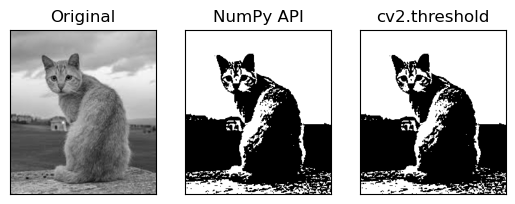

In [19]:
imgs = {'Original': imgNP, 'NumPy API':threshNP, 'cv2.threshold': thresh_cv}

for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

[3] 임게값에 따른 이미지 <hr>

In [22]:
## dummy 함수
def nothing(x): pass

## 트랙바 생성
cv2.namedWindow('Binary')
cv2.createTrackbar('threshold', 'Binary', 0, 255,nothing)
cv2.setTrackbarPos('threshold', 'Binary', 127)

In [23]:
## 이미지 로딩 및 출력
img_color = cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_COLOR)
cv2.imshow('Color', img_color)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', img_gray)


ESC_KEY = 27

while(True):
    low = cv2.getTrackbarPos('threshold', 'Binary')
    ret,img_binary = cv2.threshold(img_gray, low, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow('Binary', img_binary)

    img_result = cv2.bitwise_and(img_color, img_color, mask = img_binary)
    cv2.imshow('Result', img_result)

    if cv2.waitKey(1)&0xFF == ESC_KEY: break

cv2.destroyAllWindows()